# Importing models from ONNX to CNTK

In this tutorial, we will demonstrate how to import ONNX models into CNTK.

## Installation

To import from ONNX, simply make sure you have CNTK 2.3.1 or higher installed. <br>
Follow CNTK installation instructions __[here](https://docs.microsoft.com/en-us/cognitive-toolkit/Setup-CNTK-on-your-machine)__.

## API Usage

To load an ONNX model, specify the ONNX format for the format parameter of the load function.

**Using Python API**

```python
import cntk as C
z = C.Function.load(<path of your ONNX model>, format=C.ModelFormat.ONNX)
```

**Using C# API**

```csharp
Function modelFunc = Function.load(<path of your ONNX model>, ModelFormat.ONNX);
```

## Trying it out with VGG-19

Now let's go through an example of loading a pretrained ONNX model into CNTK using Python.

### Step 1: Prepare an ONNX model to import

You can find a collection of pretrained ONNX models [here](https://github.com/onnx/models). For this tutorial, we will be using the pretrained VGG-19 model.

Download this file https://github.com/onnx/models/blob/main/validated/vision/classification/vgg/model/vgg19-caffe2-9.tar.gz to your working directory, and extract the tarball of the model. Inside the extracted folder you will find a protobuf file `model.pb`, which is the serialized ONNX model.

### Step 2: Import the ONNX model into CNTK

Now let's load this ONNX model into CNTK.

In [35]:
import cntk as C

In [36]:
z = C.Function.load("vgg19/model.pb", device=C.device.cpu(), format=C.ModelFormat.ONNX)

### Step 3: Prepare an image for inference

Now that we've successfully loaded our model into CNTK, let's run inference on an input image to test it out. Here we will use an image of a husky.

In [13]:
import numpy as np
from PIL import Image
from IPython.core.display import display

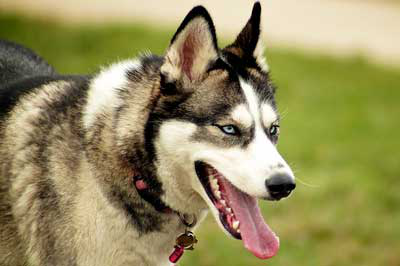

In [14]:
img = Image.open("assets/dog.jpg")
display(img) #show the image

In the following code block, we prepare our input image for evaluation. First, we resize the image and perform mean subtraction. Then, we flip the image's channel order from RGB to BGR (PIL loads the image in RGB order, but CNTK expects BGR). Finally, we transpose the indices from `(image_width, image_height, num_color_channels)` to `(num_color_channels, image_width, image_height)` using the `np.rollaxis()` function, to adhere to the shape expected by CNTK.  

In [30]:
img = img.resize((224,224))
rgb_img = np.asarray(img, dtype=np.float32) - 128
bgr_img = rgb_img[..., [2,1,0]]
img_data = np.ascontiguousarray(np.rollaxis(bgr_img,2))

### Step 4: Evaluate model on image

Now let's evaluate our image using the VGG-19 model and examine the results, in this case the top category identified by the network.

In [29]:
predictions = np.squeeze(z.eval({z.arguments[0]:[img_data]}))
top_class = np.argmax(predictions)
print(top_class)

248


In order to more easily comprehend the results, let's go ahead and download a [pickled dictionary](https://gist.github.com/yrevar/6135f1bd8dcf2e0cc683) that maps the 1000 ImageNet class IDs to human-readable labels. Extract the pickle file to your working directory.

In [37]:
import pickle

labels_dict = pickle.load(open("imagenet1000_clsid_to_human.pkl", "rb"))
print(labels_dict[top_class])

Eskimo dog, husky


As we can see, our model was able to accurately classify the image of the dog as an Eskimo husky dog.